In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [294]:
m = 1000
X = np.random.rand(m, 1) * 100 - 50
y = 5 + 2 * X + np.random.randn(m, 1) * 3

In [295]:
class LinearRegression:
    def __init__(self, learning_rate=0.1, n_epochs=100, batch_size=0, keep_thetas=False):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.keep_thetas = keep_thetas
        self.batch_size = batch_size
        
    def fit(self, X, y):
        X_b = np.c_[np.ones((len(X), 1)), X]
        self.theta_ = np.random.randn(len(X_b[0]), 1)
        
        # store theta values 
        if self.keep_thetas:
            self.thetas_ = []
        
        if self.batch_size == 0:
            for _ in range(self.n_epochs):
                gradients = 2 / len(X) * X_b.T.dot(X_b.dot(self.theta_) - y)
                self.theta_ -= self.learning_rate * gradients
                if self.keep_thetas:
                    self.thetas_.append(self.theta_.ravel().copy())
                
        else:
            for _ in range(self.n_epochs):
                for _ in range(int(len(X) / self.batch_size)):
                    rand_indices = np.random.choice(range(len(X)), size=self.batch_size)
                    X_batch = X_b[rand_indices, :]
                    y_batch = y[rand_indices, :]
                    gradients = 2 / len(X) * X_batch.T.dot(X_batch.dot(self.theta_) - y_batch)
                    self.theta_ -= self.learning_rate * gradients
                    if self.keep_thetas:
                        self.thetas_.append(self.theta_.ravel().copy())
            
    def predict(self, X):
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.theta_)
    
    def plot(self, X, y):
        min_, max_ = X.min(), X.max()
        X_line = [min_, max_]
        y_line = self.predict(X_line)
        plt.scatter(X, y)
        plt.plot(X_line, y_line, color="salmon")
        plt.show()
        
    def plot_thetas(self, dest_x=None, dest_y=None):
        if not self.keep_thetas:
            raise Exception("Thetas were not stored during training, set keep_thetas=True")
            
        self.thetas_ = np.array(self.thetas_)
        plt.xlim(0, 6)
        plt.ylim(0, 4)
        plt.plot(self.thetas_[:, 0], self.thetas_[:, 1])
        
        if dest_x is not None and dest_y is not None:
            plt.scatter([dest_x], [dest_y], color="red", s=100)
        
        plt.show()

In [329]:
np.random.seed(42)
reg = LinearRegression(n_epochs=100, learning_rate=0.01, keep_thetas=True,
                       batch_size=30)
reg.fit(X, y)
reg.theta_

array([[4.62560149],
       [1.98969857]])

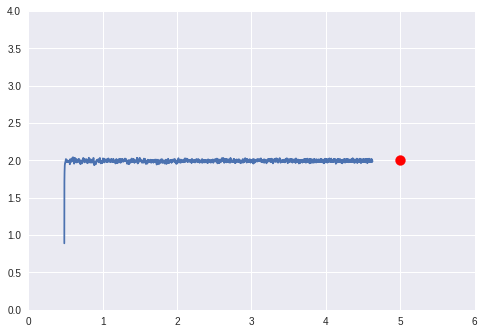

In [330]:
reg.plot_thetas(dest_x=5, dest_y=2)